In [3]:
import matplotlib.pyplot as plt
import pandas
import os
import matplotlib
import seaborn as sns
% matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12,6]
results = pandas.read_csv('/home/pc517/ga-dist/distributed/logs/2018:05:12-11:43:12/KangarooNoFrameskip-v4/6/results.csv')

In [25]:
results.head()

,worker_id,noise_list,ret,n_steps,n_seconds,finish_time,is_eval,worker_gen,worker_task_id,master_task_id,is_valid
0,1097524506,170915336,0.0,287,1.795820,2.542837,False,0,1613925858,1613925858,True
1,627221361,201107233,0.0,272,1.830092,2.611330,False,0,1613925858,1613925858,True
2,969320931,245098612,0.0,285,1.987825,2.660730,False,0,1613925858,1613925858,True
3,718410373,111639796,0.0,272,1.904818,2.663085,False,0,1613925858,1613925858,True
4,61423906,112431180,0.0,267,1.857531,2.671305,False,0,1613925858,1613925858,True


In [47]:
worker_ids = list(set(results["worker_id"]))
worker_idxs = dict(zip(worker_ids, range(len(worker_ids))))
valid_results = results[results.is_valid]
invalid_results = results[results.is_valid!= True]
invalid_evals = invalid_results[invalid_results.is_eval]
invalid_muts = invalid_results[invalid_results.is_eval!=True]
valid_muts = valid_results[valid_results["is_eval"] == False]
valid_evals = valid_results[valid_results["is_eval"] == True]

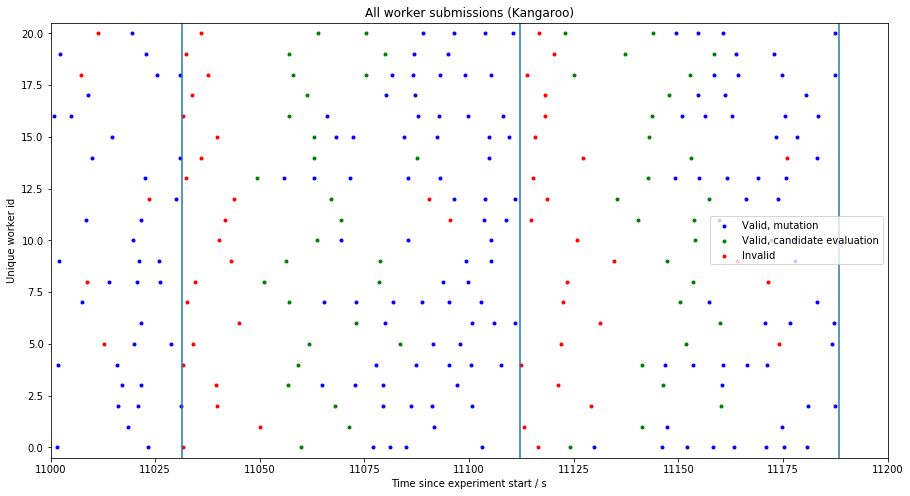

In [24]:
plt.scatter(valid_muts["finish_time"], [worker_idxs[x] for x in valid_muts["worker_id"]], marker=".", color="blue")
plt.scatter(valid_evals["finish_time"], [worker_idxs[x] for x in valid_evals["worker_id"]], marker=".", color="green")
plt.scatter(invalid_results["finish_time"], [worker_idxs[x] for x in invalid_results["worker_id"]], marker=".", color="red")
plt.xlim(11000,11200)
plt.ylim(-0.5,20.5)
# plt.yticks(range(20))
plt.xlabel("Time since experiment start / s")
plt.ylabel("Unique worker id")
plt.title("All worker submissions (Kangaroo)")
plt.legend(["Valid, mutation", "Valid, candidate evaluation", "Invalid"])
plt.axvline(x=11188.407032728195)
plt.axvline(x=11112.116198062897)
plt.axvline(x=11031.423524141312)

/home/pc517/anaconda3/envs/ga/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


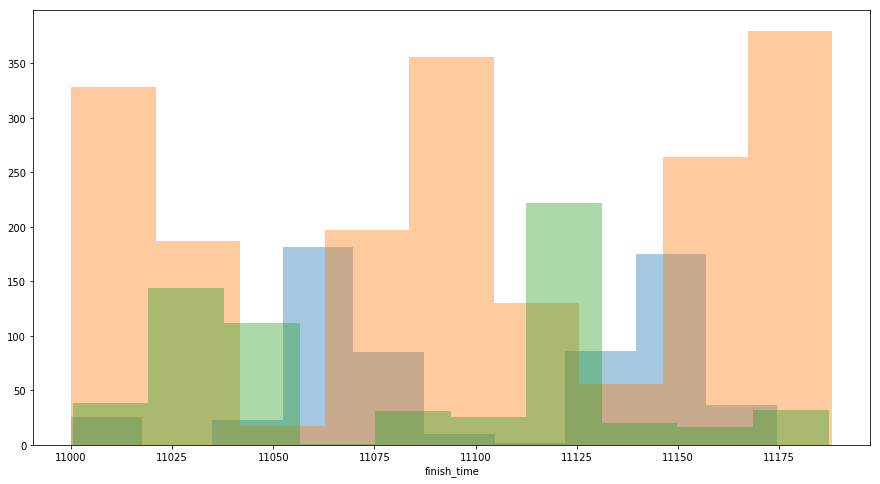

In [41]:
def ts_filter(min, max):
    return lambda x: min<=x<=max

eval_finishes = valid_evals["finish_time"]
mut_finishes = valid_muts["finish_time"]
invalid_finishes = invalid_results["finish_time"]
min = 11000
max = 11200
sns.distplot(eval_finishes[eval_finishes.apply(ts_filter(min,max))], kde=False, norm_hist=False)
sns.distplot(mut_finishes[mut_finishes.apply(ts_filter(min,max))], kde=False, norm_hist=False)
sns.distplot(invalid_finishes[invalid_finishes.apply(ts_filter(min,max))], kde=False, norm_hist=False)

In [44]:
sns.boxplot(valid_muts["worker_gen"].filter(ts_filter(3000,4000)), valid_muts["n_steps"].filter(ts_filter(3000,4000)))

TypeError: 'function' object is not iterable